In [ ]:
from keras.applications import MobileNet

In [ ]:
model = MobileNet(weights='imagenet' , include_top=False , input_shape=(224,224,3) )

In [ ]:
model.layers[0].input

In [ ]:
model.layers[0].trainable

In [ ]:
model.output

In [ ]:
for i in model.layers:
    i.trainable=False

In [ ]:
model.layers[6].trainable

In [ ]:
top_model = model.output

In [ ]:
from keras.layers import Dense , Dropout

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import GlobalAveragePooling2D

In [ ]:
from keras.layers import Flatten

In [ ]:
top_model = Flatten()(top_model)

In [ ]:
top_model = Dense(100 , activation='relu' )(top_model)

In [ ]:
top_model = Dropout(0.4)(top_model)

In [ ]:
top_model = Dense(50 , activation='relu' )(top_model)

In [ ]:
top_model = Dropout(0.4)(top_model)

In [ ]:
top_model = Dense(2 , activation='softmax' )(top_model)

In [ ]:
from keras.models import Model

In [ ]:
model= Model(inputs=model.input , outputs = top_model)

In [ ]:
model.summary()

In [ ]:
from keras.optimizers import Adam

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01) , loss='categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
traingen = ImageDataGenerator(rescale=1./255 , zoom_range=0.2 , horizontal_flip=True ,  vertical_flip=True )

In [ ]:
testgen = ImageDataGenerator(rescale=1./255)

In [ ]:
trainset = traingen.flow_from_directory(r"C:\Users\Raj\Desktop\Downs_Syndrome_Detection-main\train" , target_size=(224,224) , batch_size=32 , class_mode='categorical' )

In [ ]:
testset = testgen.flow_from_directory(r"C:\Users\Raj\Desktop\Downs_Syndrome_Detection-main\test" , target_size=(224,224) , batch_size=32 , class_mode='categorical' )

In [ ]:
history=model.fit(trainset , epochs=3 , validation_data=testset , steps_per_epoch=5, validation_steps=5 )
model.save("weights.h5")

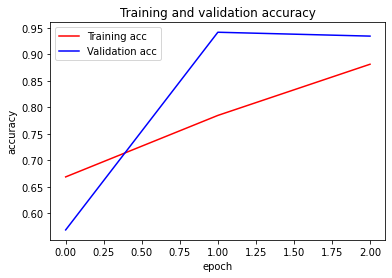

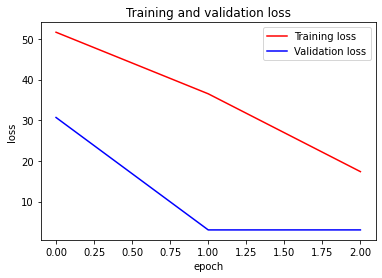

In [32]:
import matplotlib.pyplot as plt
#Graphing our training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [34]:
import numpy as np
preds = np.round(model.predict(testset))

In [ ]:
from keras.models import load_model

classifier = load_model("weights.h5")

In [ ]:
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join

check_dict = {"[0]": "downs_negative", 
                      "[1]": "downs_positive",}

check_dict_n = {"downs_negative": "downs_negative", 
                      "downs_positive": "downs_positive",}

def draw_test(name, pred, im):
    face = check_dict[str(pred)]
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 120, 0, 0, 140 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, face, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.imshow(name, expanded_image)

def getRandomImage(path):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    print("Class - " + check_dict_n[str(path_class)])
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    return cv2.imread(file_path+"/"+image_name)    

for i in range(1,10):
    input_im = getRandomImage(r'C:/Users/Raj/Desktop/Downs_Syndrome_Detection-main/test/')
    if input_im is None:
        break;
    input_original = input_im.copy()
    input_original = cv2.resize(input_original, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
    
    input_im = cv2.resize(input_im, (224, 224), interpolation = cv2.INTER_LINEAR)
    input_im = input_im / 255.
    input_im = input_im.reshape(1,224,224,3) 
    
    # Get Prediction
    res = np.argmax(classifier.predict(input_im, 1, verbose = 0), axis=1)
    
    # Show image with predicted class
    draw_test("Prediction", res, input_original) 
    cv2.waitKey(0)
cv2.destroyAllWindows()
